In [1]:
### Import Statements ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('criminal_test.csv')
df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(test_size=0.30, 
                                                    random_state=101)

ValueError: At least one array required as input

In [7]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression(C=6.0)
logmodel.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [13]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
#rf = RandomForestClassifier() #default 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train) 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,0.471270,0.552089,-0.540781,0.396978,-0.016203,-0.084078,-0.05381,-0.340282,-0.071462,0.132918,...,-0.393260,-0.03552,-0.038737,-1.029324,-0.978921,0.151664,0.153465,2.051187,-0.388665,-0.997728
1,-0.747973,0.552089,-0.540781,0.396978,-0.016203,-0.993269,-0.05381,-0.340282,-0.071462,0.132918,...,0.787760,-0.03552,-0.038737,-1.029324,-0.978921,0.151664,0.153465,-0.287898,1.249606,1.002277
2,0.974867,-1.136984,-0.540781,-0.301415,-0.016203,-0.084078,-0.05381,-0.340282,-0.071462,0.132918,...,-1.574281,-0.03552,-0.038737,0.585440,0.310439,0.151664,0.153465,-0.768750,0.976561,1.002277
3,-1.679397,0.552089,-0.540781,1.793764,-0.016203,-0.084078,-0.05381,-0.340282,-0.071462,0.132918,...,0.787760,-0.03552,-0.038737,-1.029324,-0.978921,0.151664,0.153465,0.129145,-0.593449,-0.997728
4,-0.902492,-1.981521,-0.540781,0.396978,-0.016203,0.825113,-0.05381,-0.340282,-0.071462,0.132918,...,0.787760,-0.03552,-0.245446,-1.029324,-0.978921,0.151664,0.153465,-0.785140,-0.593449,-0.997728


In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Criminal'], test_size=0.30, 
                                                    random_state=101)

In [32]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
#rf = RandomForestClassifier() #default 
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
predict = rf.predict(df_feat)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

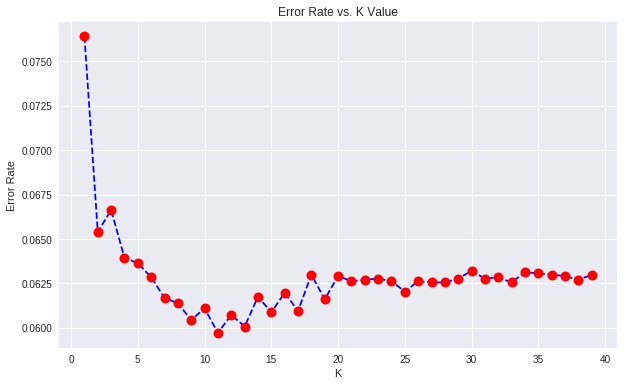

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [33]:
pred_i = rf.predict(df.drop(['PERID'],axis=1))

In [34]:
final_predict = pd.DataFrame(pred_i,columns=['Criminal'])

In [35]:
result = pd.DataFrame(df['PERID'],columns=['PERID'])

In [36]:
result = pd.concat([result,final_predict],axis=1)

In [37]:
result.to_csv('final_predictions.csv',index=False)
result['Criminal'].value_counts()

0    10781
1      649
Name: Criminal, dtype: int64